# Python的可视化包——Matplotlib

Matplotlib是Python中最常用的可视化工具之一，可以非常方便的创建各种图表。

官网：[http://matplotlib.org](http://matplotlib.org)

----

## 1. Matplotlib的加载

如果要在jupyter notebook中交互式的使用matplotlib的绘图，需要加上以下命令：
```
%matplotlib inline
```
按照惯例：matplotlib的别名为mpl，matplotlib.pyplot的别名为plt。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 可以使用rcParams来设置一些全局参数
# 例如，下面的设置用来把坐标轴的字体设置为18pt
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18

# 2. Matplotlib的2D绘图


## 2.1 绘制点、线图
例如绘制下面的函数：
$2*sin(x)+0.3x^2$
1. 绘制标准的函数；
2. 进行随机采样，采样的时候遵从高斯分布
$ \sim {\rm N}\left( {\mu ,{\sigma ^2}} \right)$

In [3]:
np.random.seed(42)

# x轴的采样点设置为0到5之间的100个点
x = np.linspace(0, 5, 100)

# 计算两个数据列，y用来存储无噪声的结果，y_sample用来存储带有噪声的采样结果
y = 2 * np.sin(x) + 0.3 * x ** 2
y_sample = y + np.random.normal(scale=0.3, size=100)

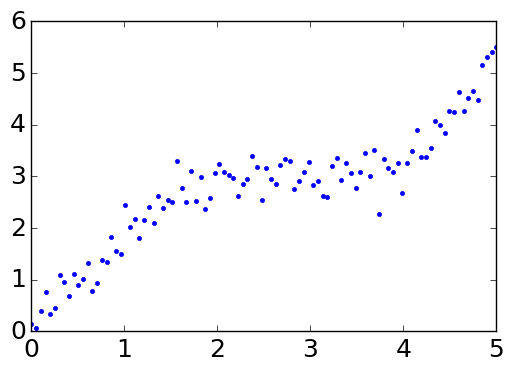

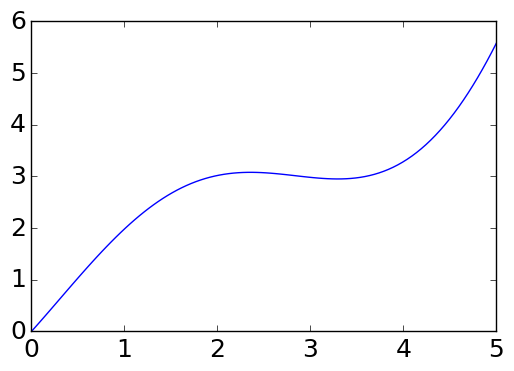

In [4]:
# 绘制采样数据的散点图
plt.figure('data')

# 输出采样数据
plt.plot(x, y_sample, '.')

# 绘制模型数据的曲线图
plt.figure('model')

# 绘制曲线
plt.plot(x,y)

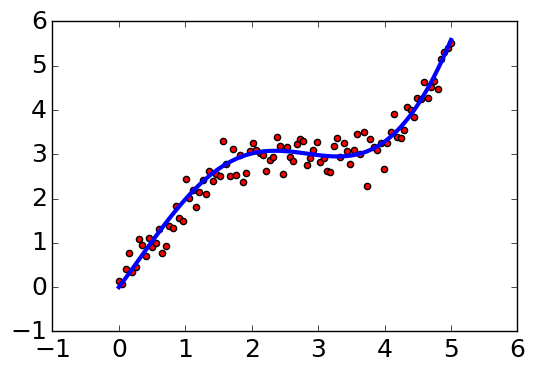

In [5]:
# 同时显示两个数据系列到同一个图表中

plt.figure('data & model')

# 用'b'设置线的颜色，lw=3
# 'b'也可以改为'r--'，表示红色的虚线
plt.plot(x, y, 'b', lw=3)

# scatter用来绘制散点图
plt.scatter(x, y_sample, c='r', edgecolor='k')

# 将当前figure的图保存到文件
plt.savefig('result.png')

## 2.2 绘制饼图、柱状图与子图

In [6]:
# 对图表的全局配置进行修改
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['axes.labelsize'] = 9
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

In [7]:
# 狗、猫和猎豹的最高奔跑速度
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

([<matplotlib.patches.Wedge at 0x10ee352b0>,
  <matplotlib.text.Text at 0x10ebf1908>])

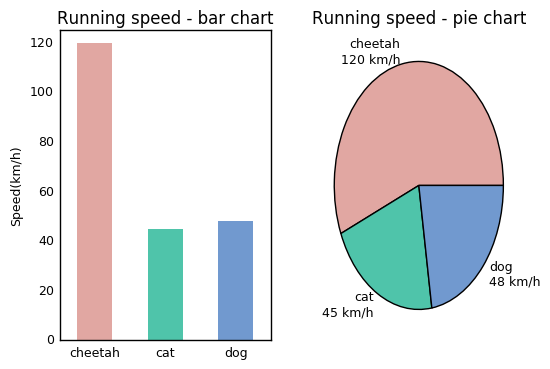

In [8]:
fig = plt.figure('Bar chart & Pie Chart')

# 添加一个子图，一行两列的子图的第一个
ax = fig.add_subplot(1, 2, 1)
ax.set_title('Running speed - bar chart')

# 生成x轴的每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应的颜色
colors = [x[1] for x in speed_map.values()]

# 绘制柱状图
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none', color=colors)

# 设置图表的属性
ax.set_ylabel('Speed(km/h)')
ax.set_xticks(xticks+bar_width/2)
ax.set_xticklabels(animals)
ax.set_xlim(bar_width/2 - 0.5, 3 - bar_width/2)
ax.set_ylim([0, 125])


# 添加一个新的子图
ax = fig.add_subplot(1, 2, 2)
ax.set_title('Running speed - pie chart')


labels = ['{0}\n{1} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

# 3. Matplotlib的3D作图

3D图表需要使用pml_toolkits模块。
## 3.1 曲面图

In [9]:
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# x-y平面的格点数， 中心位置， 低频成分的个数
n_grids = 51
c = n_grids // 2
nf = 2

# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)

# 用meshgrid把x和y组合成n_grids * n_grids的矩阵， X和Y对应位置就是所有各点的坐标
X, Y = np.meshgrid(x, y)

In [10]:
# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)

# 生成一段噪音，用于提供5*5的grid。
noise = [np.complex(x, y) for x, y in np.random.uniform(-1, +1, ((2 * nf + 1) ** 2 // 2, 2))]

# 傅里叶频谱的每一项和其共轭关于中心对称
noisy_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))

# 将生成的频谱作为低频部分
spectrum[c-nf:c+nf+1, c-nf:c+nf+1] = noisy_block.reshape((2*nf + 1, 2*nf + 1))

# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))

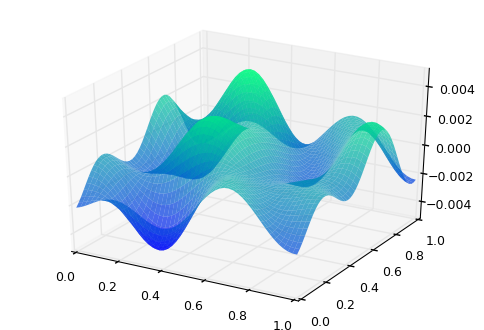

In [11]:
fig = plt.figure('3D surface')
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='winter', rstride=1, cstride=1, lw=0)

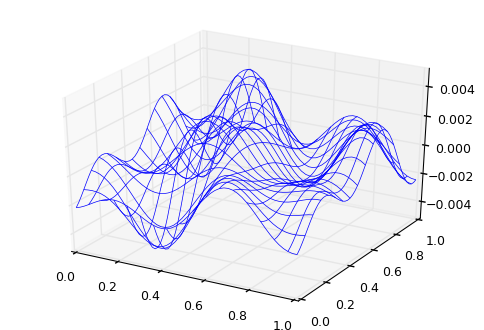

In [12]:
fig = plt.figure('3D wire')
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

## 3.2 散点图

In [13]:
np.random.seed(42)

n_samples = 500
dim = 3
shape = (500, 1)

# 生成一组三维正态分布采样
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 均匀分布采样数据，通过改变每个样本距离原点的距离来实现。 乘以随机生成的半径，除以向量的2范数，缩放向量到圆内
r = np.random.random(shape)
dist = np.linalg.norm(samples, axis=1).reshape(shape)
samples *= r / dist


x = samples[:,0].reshape(shape)
y = samples[:,1].reshape(shape)
z = samples[:,2].reshape(shape)
upperIndexes = np.where(z > 3 * x + 2 * y -1)[0]
lowerIndexes = np.where(z <= 3 * x + 2 * y - 1)[0]

upperSamples = samples[upperIndexes, :]
lowerSamples = samples[lowerIndexes, :]


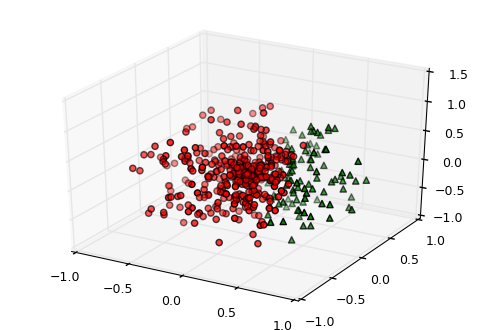

In [14]:
fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

ax.scatter(upperSamples[:, 0], upperSamples[:, 1], upperSamples[:, 2], c='r', marker='o')
ax.scatter(lowerSamples[:, 0], lowerSamples[:, 1], lowerSamples[:, 2], c='g', marker='^')

# 4. 绘制椭圆

本小节根据椭圆的中心$\mu$和协方差矩阵$\Sigma$来绘制椭圆。

在概率模型中，我们经常利用高斯分布来近似某个连续的分布，而高斯分布通常表示为$\sim N(x ; \mu , \sigma^2)$。

在绘制图表时经常利用椭圆来表示位置$\mathbf{x} = (x,y)^T$不确定性，例如一个二元高斯分布的椭圆就可以表示为：$(\mathbf{x - \mu})^T \mathbf\Sigma^{-1} (\mathbf{x - \mu}) = s$。

其中$s$代表了椭圆的规模和置信水平，例如我们希望达到$95\%$的置信水平，那么$s$需要满足：$P(s < a) = 1 - 0.05 = 0.95$，通过查自由度为2的$\chi^2$分布表，我们可以知道$P(s < 5.991) = 1 - 0.05 = 0.95$，也就是说当$s < 5.991$时，$95\%$的样本都落在这个范围内。

> $\chi^2$分布的置信度也可以用scipy.stats.chi2.isf(0.05, 2)来计算。

In [15]:
from scipy.stats import chi2
np.sqrt(chi2.isf(0.05, 2))

2.4477468306808166

由协方差$\Sigma$表示的椭圆，其长轴半径为$\sqrt{\lambda_1}$(较大的特征值），短轴半径为$\sqrt{\lambda_2}$（较小的特征值）。

椭圆的方向为：$\alpha = arctan \frac {v_1 (y)}{v_1 (x)}$，其中$v_1$是最大特征向量，利用最大特征向量来计算角度。为了达到$95\%$的置信度，还要乘以常数$2 \sqrt{5.991}$

下面以$\mu = (3, 4)^T$，$\Sigma = \begin{bmatrix} 2 & 1 \\ 1 & 2 \end{bmatrix}$为例来绘制椭圆。

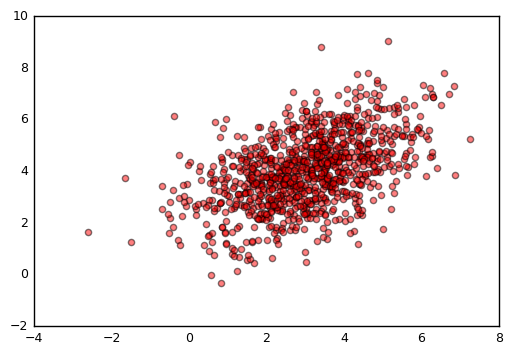

In [16]:
mu = np.array([3, 4])
sigma = np.array([2, 1, 1, 2]).reshape((2, 2))
samples = np.random.multivariate_normal(mu, sigma, 1000)

plt.figure('Gaussian')
plt.scatter(samples[:,0], samples[:,1], c='r', alpha=0.5)

In [17]:
scale = np.sqrt(5.991) * 2
e, v = np.linalg.eig(sigma)
print(e)
print(v[0])

width = np.sqrt(e[0]) * scale
length = np.sqrt(e[1]) * scale
alpha = np.degrees(np.arctan(v[1][0]/v[0][0]))

width, length, alpha

[ 3.  1.]
[ 0.70710678 -0.70710678]


(8.4789150249309611, 4.895303872079853, 45.0)

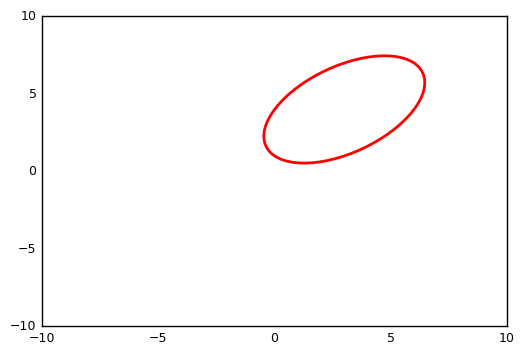

In [18]:
# 绘制椭圆
from matplotlib.patches import Ellipse

ell = Ellipse(xy=mu, width=width, height=length, angle=alpha, 
              facecolor='none', edgecolor='r', linestyle = '-',  linewidth=2)

fig = plt.figure('oval')
ax = fig.add_subplot(111)
ax.add_artist(ell)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
plt.show()

[ 7.  3.]


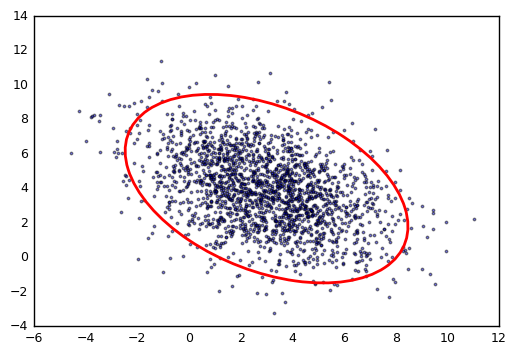

In [19]:
# 将散点绘制到一起
from matplotlib.patches import Ellipse

mu = np.array([3, 4])
sigma = np.array([5, -2, -2, 5]).reshape((2, 2))
samples = np.random.multivariate_normal(mu, sigma, 2000)


scale = np.sqrt(5.991) * 2
e, v = np.linalg.eig(sigma)
width = np.sqrt(e[0]) * scale
length = np.sqrt(e[1]) * scale
alpha = np.degrees(np.arctan(v[1][0]/v[0][0]))
print(e)

fig = plt.figure('oval')
ax = fig.add_subplot(111)

ell = Ellipse(xy=mu, width=width, height=length, angle=alpha, 
              facecolor='none', edgecolor='r', linestyle = '-',  linewidth=2)

ax.add_artist(ell)
ax.scatter(samples[:,0], samples[:,1], s=3, c='b', alpha=0.5)

In [20]:
# 定义函数getEllipse，根据均值和协方差来返回一个Ellipse对象
def getEllipse(mu, sigma):
    scale = np.sqrt(5.991) * 2
    e, v = np.linalg.eig(sigma)
    
    if (e[0] < 0 or e[1] < 0):
        raise ValueError
    
    width = np.sqrt(e[0]) * scale
    length = np.sqrt(e[1]) * scale
    alpha = np.degrees(np.arctan(v[1][0]/v[0][0]))
    ell = Ellipse(xy=mu, width=width, height=length, angle=alpha, 
              alpha=0.5, facecolor='none', edgecolor='r', linestyle = '--',  linewidth=1)
    return ell

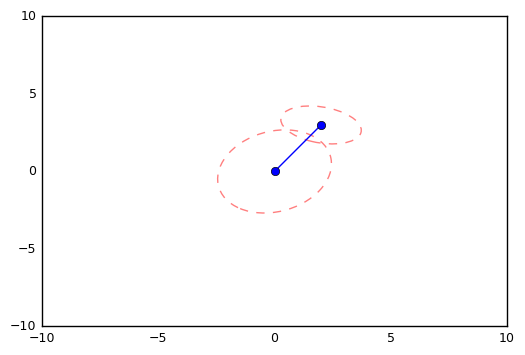

In [21]:
fig = plt.figure('oval')
ax = fig.add_subplot(111)

ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

mu1 = np.array([0, 0])
sigma1 = np.array([1, 0.2, 0.2, 1.2]).reshape((2, 2))

try:
    ax.add_artist(getEllipse(mu1, sigma1))
except ValueError:
    print('The covariance matrix is not positive-semidefinited')
    
mu2 = np.array([2, 3])
sigma2 = np.array([0.5, -0.1, -0.1, 0.25]).reshape((2, 2))

try:
    ax.add_artist(getEllipse(mu2, sigma2))
except ValueError:
    print('The covariance matrix is not positive-semidefinited')
    print(sigma)
    
mu = np.vstack([mu1, mu2])
ax.plot(mu[:,0], mu[:,1], ls='-', c='b', lw=1, marker='o')